In [1]:
import numpy as np
import pandas as pd
import torch
import json
import os
import pickle
from collections import OrderedDict
import psutil
import gc
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
def print_txt(msg: str):
    print(msg, end = '\r')
    text_file = open("Outputs/input_cnn_preprocessing.txt", "w")
    text_file.write(msg)
    text_file.close()

In [3]:
##directorys
input_path = 'data/scraped_matches/inputs/'
gaia_path = 'data/scraped_matches/gaia_data/'

#players
player_ids = ['p1','p2']
player_winner_dict = {0: 'p1',1: 'p2'}

In [4]:
#load data
with open('data/scraped_matches/parsed_matches/arabia_matches.pkl', 'rb') as f:
    org_matches = pickle.load(f)
matches = org_matches

#load masterdata
with open('masterdata/masterdata_dict.pkl', 'rb') as f:
        masterdata_dict = pickle.load(f)

with open('masterdata/unit_type_dict.pkl', 'rb') as f:
        unit_type_dict = pickle.load(f)        

with open('masterdata/unit_masterdata_dict.pkl', 'rb') as f:
        unit_masterdata_dict = pickle.load(f)      
        
        


In [5]:
match = matches['50453403']
match_id = '50453403'
match

{'match_id': '50453403',
 'fn': '?gameId=50453403&profileId=594394',
 'map': 'Arabia',
 'map_size': 'Tiny',
 'duration': 3445,
 'dataset': 'Definitive Edition',
 'difficulty': 'Hardest',
 'input_fn': 'data/scraped_matches/inputs/50453403.pkl',
 'gaia_fn': 'data/scraped_matches/gaia_data/50453403.pkl',
 'p1_name': 'Zirafo',
 'p2_name': 'Esteban',
 'p1_elo': 975,
 'p2_elo': 1233,
 'p1_civ': 'Vikings',
 'p2_civ': 'Mayans',
 'p1_xpos': 92.0,
 'p2_xpos': 24.0,
 'p1_ypos': 37.0,
 'p2_ypos': 78.0,
 'winner': 0}

In [6]:
with open(matches[match_id]['input_fn'], 'rb') as f:
            inputs = pickle.load(f)

In [7]:
type_dict = {}
for id in inputs:
    input = inputs[id]
    if input['type'] not in type_dict:
        type_dict[input['type']] = input


In [8]:
type_dict.keys()
#start with move_target_build
#inputs

dict_keys(['Queue', 'Research', 'Build', 'Move', 'Gather Point', 'Gather', 'De Autoscout', 'Order', 'Garrison', 'Ungarrison', 'Wall', 'Target', 'Delete', 'Spawn', 'Back To Work', 'Unqueue', 'Repair', 'Reseed', 'Chat', 'Farm Autoqueue', 'Town Bell', 'Stance', 'Pack Trebuchet', 'Formation', 'Resign'])

In [9]:
def get_distance(coord1: list,coord2: list):
  """returns distance between 2 2D Coordinates"""
  distance = np.linalg.norm(np.array(coord1)-np.array(coord2))
  return distance



In [10]:
rel_input_types = ['Build','Move','Target']
timelimit = 1200

input_matchids = []
input_labels = {}

input_level_types = {}

perspectives = ['win','lose']
views = {}



#init empty arrays for win/lose
for wl in perspectives:
    views[wl] = {}
    for type in rel_input_types:
                views[wl][type] = []
                for dist in range(0,171):
                    views[wl][type].append(0)
        

for index,match_id in enumerate(matches):
    #determine winner of each match
    winner = player_ids[matches[match_id]['winner']]
    
    
    match = matches[match_id]
    
    #open inputs
    with open(match['input_fn'], 'rb') as f:
                    inputs = pickle.load(f)
    #init empty arrays in distance size
    
    for p_id in player_ids: 
        this_view = {}
        
        for type in rel_input_types:
            this_view[type] = []
            for dist in range(0,180):
                this_view[type].append(0)
        
        for input_id in inputs:
            input = inputs[input_id]
            
            if input['type'] in rel_input_types and input['ts_seconds']<=timelimit and p_id == input['player']:
                try:
                    #fill values into view
                    dist = get_distance([match[f'{p_id}_xpos'],match[f'{p_id}_ypos']],[int(input['x_pos']),int(input['y_pos'])])
                    this_view[input['type'] ][int(dist)] +=1
                
                except:
                    print(input['type'] ,dist,match[f'{p_id}_xpos'],match[f'{p_id}_ypos'],input['x_pos'],input['y_pos'])
                     
        #deterimne if winner                                
        if p_id == winner:
            wl = 'win'
        else:
            wl = 'lose'

        for type in rel_input_types:
            for dist in range(0,171):
                views[wl][type][dist] += this_view[type][dist]
    
    if index % 1000 == 0:
        print_txt(f'{index}/{len(matches)}')

In [11]:
if False:
    output = open('data/feature_maps/input_matchids.pkl' , 'wb')
    pickle.dump(input_matchids, output)
    output.close()
    output = open('data/feature_maps/input_labels.pkl' , 'wb')
    pickle.dump(input_labels, output)
    output.close()


In [12]:
print_txt("check")

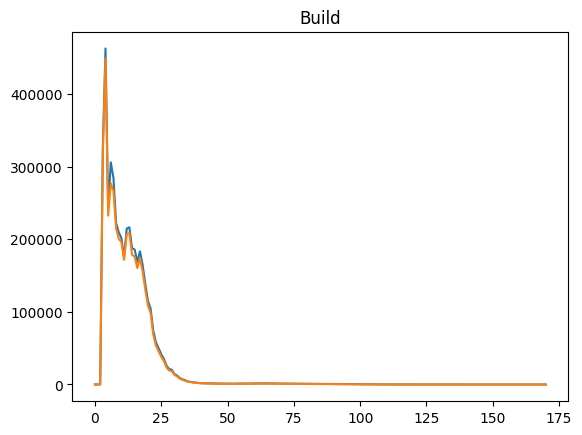

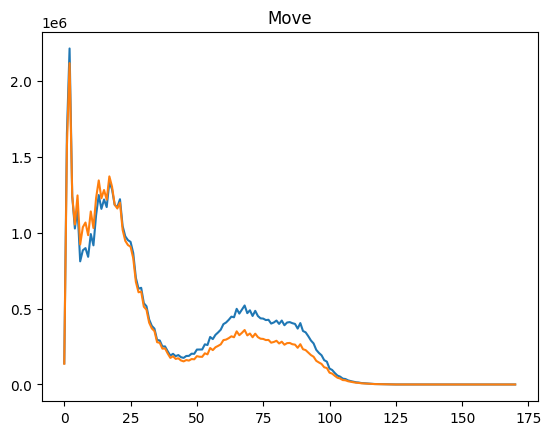

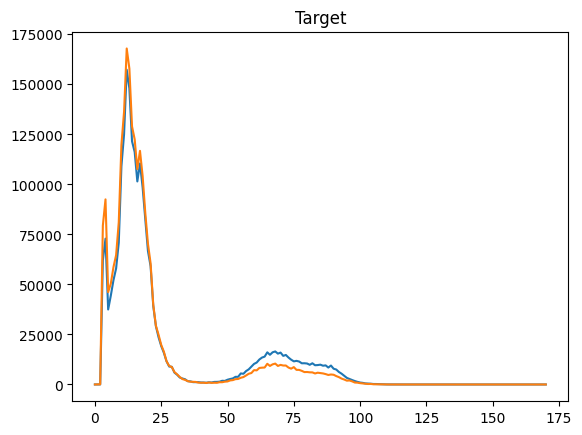

In [13]:
x=[i for i in range(0,180)]
for type in rel_input_types:

    fig, ax = plt.subplots()
    for wl in perspectives:
        ax.plot(views[wl][type])
    plt.title(type)
    plt.show()

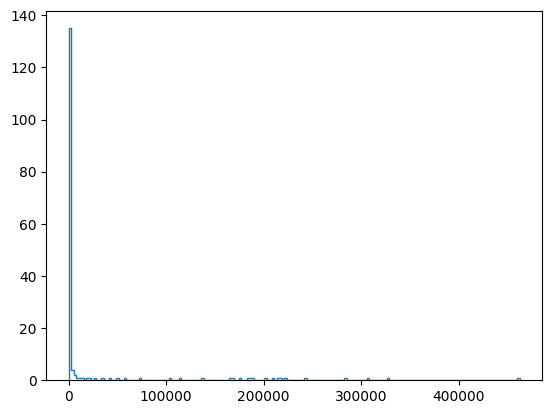

In [14]:
plt.hist(views['win']['Build'],bins=180,histtype=u'step')
plt.show()

In [15]:
views

{'win': {'Build': [4,
   14,
   43,
   327701,
   462615,
   242563,
   305892,
   284275,
   222204,
   209478,
   201468,
   175061,
   214643,
   216433,
   187630,
   185838,
   168977,
   183296,
   164563,
   138147,
   115111,
   104506,
   74389,
   58285,
   49872,
   41837,
   35377,
   26038,
   21084,
   20383,
   14300,
   12392,
   8729,
   7146,
   5962,
   4110,
   3720,
   2852,
   2678,
   2199,
   1755,
   1805,
   1537,
   1459,
   1308,
   1204,
   1172,
   1177,
   1176,
   1138,
   1174,
   1172,
   1046,
   1190,
   1175,
   1310,
   1151,
   1256,
   1263,
   1385,
   1413,
   1349,
   1415,
   1441,
   1344,
   1510,
   1305,
   1352,
   1490,
   1287,
   1254,
   1185,
   1155,
   1093,
   993,
   1031,
   1006,
   956,
   889,
   887,
   923,
   797,
   852,
   751,
   761,
   757,
   692,
   674,
   652,
   606,
   541,
   536,
   480,
   458,
   415,
   340,
   303,
   288,
   231,
   234,
   155,
   133,
   110,
   80,
   73,
   37,
   57,
   45,
   43,
 